# Описание проекта Восстановление золота из руды

Нужно подготовить прототип модели машинного обучения компании, разрабатывающей решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 
Модель нужна для оптимизации производства, чтобы не запускать предприятие с убыточными характеристиками.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открою-файлы-и-изучу-их." data-toc-modified-id="Открою-файлы-и-изучу-их.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открою файлы и изучу их.</a></span></li><li><span><a href="#Подготовлю-данные" data-toc-modified-id="Подготовлю-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовлю данные</a></span></li><li><span><a href="#Проверю,-что-эффективность-обогащения-рассчитана-правильно." data-toc-modified-id="Проверю,-что-эффективность-обогащения-рассчитана-правильно.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверю, что эффективность обогащения рассчитана правильно.</a></span><ul class="toc-item"><li><span><a href="#Вычислю-эффективность-на-обучающей-выборке-для-признака-rougher.output.recovery." data-toc-modified-id="Вычислю-эффективность-на-обучающей-выборке-для-признака-rougher.output.recovery.-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Вычислю эффективность на обучающей выборке для признака rougher.output.recovery.</a></span></li><li><span><a href="#Найду-MAE-между-моими-расчётами-и-значением-признака.-Опишу-выводы." data-toc-modified-id="Найду-MAE-между-моими-расчётами-и-значением-признака.-Опишу-выводы.-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Найду MAE между моими расчётами и значением признака. Опишу выводы.</a></span></li></ul></li><li><span><a href="#1.3.-Проанализирую-признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="1.3.-Проанализирую-признаки,-недоступные-в-тестовой-выборке.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>1.3. Проанализирую признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Проведу-предобработку-данных." data-toc-modified-id="Проведу-предобработку-данных.-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Проведу предобработку данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрю,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Посмотрю,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрю, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравню-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной." data-toc-modified-id="Сравню-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравню распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</a></span></li><li><span><a href="#Исследую-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследую-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследую суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишу-функцию-для-вычисления-итоговой-метрики-sMAPE." data-toc-modified-id="Напишу-функцию-для-вычисления-итоговой-метрики-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишу функцию для вычисления итоговой метрики sMAPE.</a></span></li><li><span><a href="#Обучу-разные-модели-и-оценю-их-качество-кросс-валидацией." data-toc-modified-id="Обучу-разные-модели-и-оценю-их-качество-кросс-валидацией.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучу разные модели и оценю их качество кросс-валидацией.</a></span></li><li><span><a href="#Выберу-лучшую-модель" data-toc-modified-id="Выберу-лучшую-модель-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выберу лучшую модель</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Модель дерева решений</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Сравню-метрику-с-константной-моделью." data-toc-modified-id="Сравню-метрику-с-константной-моделью.-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Сравню метрику с константной моделью.</a></span></li></ul></li></ul></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></div>

## Подготовка данных

Импортирую библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

#from sklearn.utils import shuffle
#from scipy import stats as st
#from numpy.random import RandomState

In [2]:
import warnings # отключу уведомления
warnings.filterwarnings("ignore")

### Открою файлы и изучу их.

Импортирую данные:

In [3]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
names = ['df_train', 'df_test', 'df_full']
count = 0
for df in [df_train, df_test, df_full]:
  print('-------------------- Датафрейм', names[count], '--------------------')
  count += 1
  print()
  print('Размеры датафрейма:')
  print(df.shape)
  print()
  print('Типы и кол-во данных:')
  print(df.info())
  print()
  print('Пропущенные значения:')
  print(df.isna().sum())
  print()

-------------------- Датафрейм df_train --------------------

Размеры датафрейма:
(14149, 87)

Типы и кол-во данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
prima

In [5]:
df_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Подготовлю данные

Преобразую тип данных в колонках 'date' из object в datetime:

In [6]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_full['date'] = pd.to_datetime(df_full['date'])

In [7]:
print(df_train['date'].dtypes)
print(df_test['date'].dtypes)
print(df_full['date'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


Заполню пропуски:

In [8]:
for df in [df_train, df_test, df_full]:
    df.ffill(inplace=True)

Проверю, не осталось ли пропущенных значений:

In [9]:
for df in [df_train, df_test, df_full]:
    print(df.isna().sum().reset_index()[0].sum())

0
0
0


In [10]:
for df in [df_train, df_test, df_full]:
    print(df.duplicated().sum())

0
0
0


Пропущенных значений и дубликатов после подготовки данных нет.

### Проверю, что эффективность обогащения рассчитана правильно.

#### Вычислю эффективность на обучающей выборке для признака rougher.output.recovery.  

In [11]:
df_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

Посчитаю эффективность по формуле:

In [12]:
df_train['rougher.output.recovery_calc'] = (
    df_train['rougher.output.concentrate_au'] * (
        df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) / (
    df_train['rougher.input.feed_au'] * (
        df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100
df_train['rougher.output.recovery_calc'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery_calc, dtype: float64

Видно, что эффективность посчитана не верно. Посчитаю сумму всех отклонений:

In [13]:
(df_train['rougher.output.recovery_calc'] - df_train['rougher.output.recovery']).sum()

-9.983125437429408e-13

#### Найду MAE между моими расчётами и значением признака. Опишу выводы.

In [14]:
mae = mean_absolute_error(df_train['rougher.output.recovery_calc'], df_train['rougher.output.recovery'])
print('Среднее абсолютное отклонение:', mae)

Среднее абсолютное отклонение: 9.682896147825551e-15


MAE небольшое, но буду ориентироваться на мою новую колонку `rougher.output.recovery_calc`.

### 1.3. Проанализирую признаки, недоступные в тестовой выборке.
Что это за параметры? К какому типу относятся?

Посмотрю, какие столбцы есть в `df_train`, но нет в `df_test`:

In [15]:
difference = pd.DataFrame()
for column in df_train.columns:
  if column not in df_test.columns:
    difference[column] = df_train[column].copy()
print(difference.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 35 columns):
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.output.concentrate_ag                 14149 non-null float64
primary_cleaner.output.concentrate_pb                 14149 non-null float64
primary_cleaner.output.concentrate_sol      

Это всё количественные переменные, эти данные мы получаем в процессе флотации и их у нас не будет на момент прогнозирования, когда мы будем использовать нашу модель на новых данных.
Что касается `rougher.output.recovery` и `final.output.recovery` - это целевые переменные, соответственно их удалять не нужно, а стоит сохранить в переменные `y` или `target`.

### Проведу предобработку данных.

Удалю лишние столбцы из `df_train`, кроме целевых:

In [16]:
train_features = df_train.drop(
    labels=difference.columns.drop(
        labels=['rougher.output.recovery', 'final.output.recovery']
        ), axis=1
    )
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
date                                          14149 non-null datetime64[ns]
final.output.recovery                         14149 non-null float64
primary_cleaner.input.sulfate                 14149 non-null float64
primary_cleaner.input.depressant              14149 non-null float64
primary_cleaner.input.feed_size               14149 non-null float64
primary_cleaner.input.xanthate                14149 non-null float64
primary_cleaner.state.floatbank8_a_air        14149 non-null float64
primary_cleaner.state.floatbank8_a_level      14149 non-null float64
primary_cleaner.state.floatbank8_b_air        14149 non-null float64
primary_cleaner.state.floatbank8_b_level      14149 non-null float64
primary_cleaner.state.floatbank8_c_air        14149 non-null float64
primary_cleaner.state.floatbank8_c_level      14149 non-null float64
primary_cleaner.state.floatbank8_d_air        14149 non-

Добавлю целевые значения в `df_test`:

In [17]:
df_for_test = df_full[['date', 'rougher.output.recovery', 'final.output.recovery']]

In [18]:
df_test = pd.merge(df_test, df_for_test, on='date', how='inner')

In [19]:
df_test.shape, train_features.shape

((5290, 55), (14149, 55))

## Анализ данных

In [20]:
df_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

### Посмотрю, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [21]:
consentrates = df_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']]

In [22]:
consentrates.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
       'rougher.output.concentrate_sol', 'rougher.output.concentrate_au',
       'rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_sol', 'rougher.input.feed_au'],
      dtype='object')

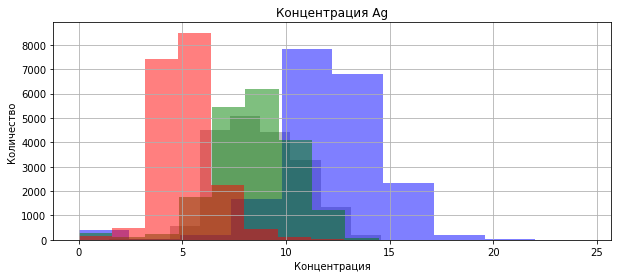

In [23]:
cons_ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
colors = ['grey', 'blue', 'green', 'red']
count_color = 0
for i in cons_ag:
    df_full[i].hist(figsize=(10,4), alpha=0.5, color=colors[count_color])
    plt.title('Концентрация Ag')
    plt.xlabel('Концентрация')
    plt.ylabel('Количество')
    #plt.legend(loc='upper right')
    count_color += 1

Концентрация серебра снижается с каждоым этапом.

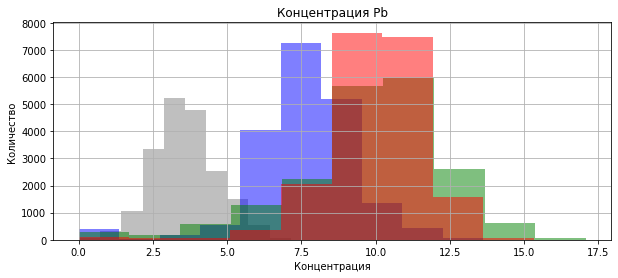

In [24]:
cons_pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
count_color = 0
for i in cons_pb:
    df_full[i].hist(figsize=(10,4), alpha=0.5, color=colors[count_color])
    plt.title('Концентрация Pb')
    plt.xlabel('Концентрация')
    plt.ylabel('Количество')
    #plt.legend(loc='upper right')
    count_color += 1

Концентрация свинца растёт - видимо, это побочный продукт переработки.

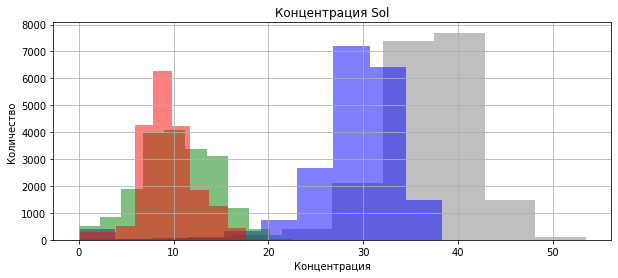

In [25]:
cons_sol = ['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol']
count_color = 0
for i in cons_sol:
    df_full[i].hist(figsize=(10,4), alpha=0.5, color=colors[count_color])
    plt.title('Концентрация Sol')
    plt.xlabel('Концентрация')
    plt.ylabel('Количество')
    count_color += 1

Концентрация элемента Sol снижается, кроме второй очистки.

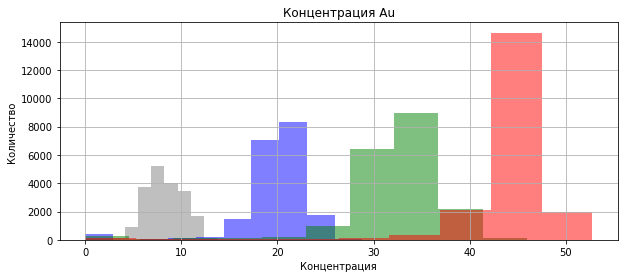

In [26]:
cons_au = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
count_color = 0
for i in cons_au:
    df_full[i].hist(figsize=(10,4), alpha=0.5, color=colors[count_color])
    plt.title('Концентрация Au')
    plt.xlabel('Концентрация')
    plt.ylabel('Количество')
    count_color += 1

Содержание золота от этапа к этапу возрастает, что логично - добываем золото. Что интересно, после второй очистки получаем довольно ставильную концентрацию, распределённую около 45%.

### Сравню распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Text(0, 0.5, 'Количество')

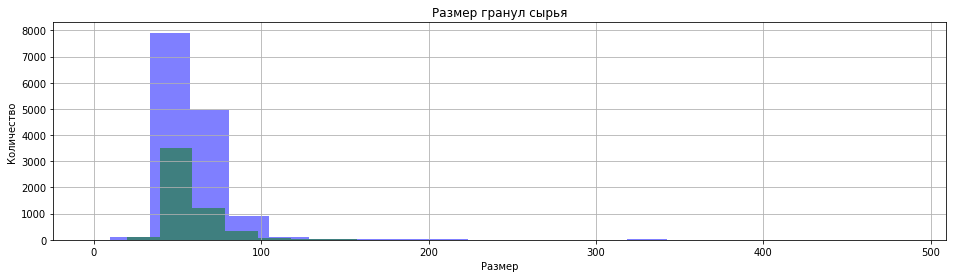

In [27]:
df_train['rougher.input.feed_size'].hist(figsize=(16,4), alpha=0.5, color='blue', bins=20)
df_test['rougher.input.feed_size'].hist(figsize=(16,4), alpha=0.5, color='green',bins=20)
plt.title('Размер гранул сырья')
plt.xlabel('Размер')
plt.ylabel('Количество')

Распределение размеров гранул очень похожи, на оценку модели не должно повлиять.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>ОК,  верно, распределение для тестовой выборки немного отличается от такового для обучающей - первое сдвинуто немного в меньшую сторону. НО в целом размеры большинства частиц лежат в оптимальном интервале  40—100 мкм  («Флотация руды»: ООО "Техноаналитприбор":[сайт].URL:https://techade.ru/stati/flotatsiya-rudy) для обоих выборок. Поэтому, да, выборки подходят для оценки.

### Исследую суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

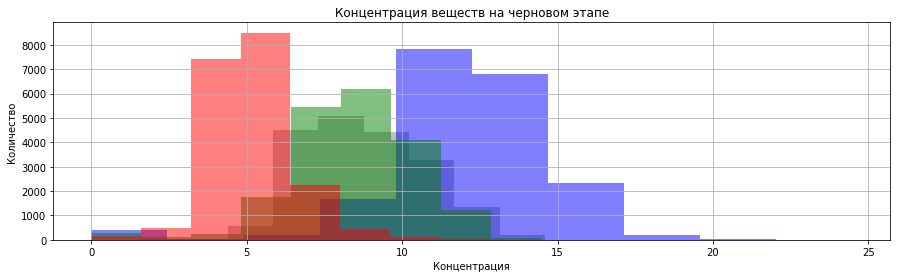

In [28]:
cons_rougher = ['rougher.input.feed_ag',
                'rougher.input.feed_pb'
                'rougher.input.feed_sol'
                'rougher.input.feed_au']
colors = ['grey', 'blue', 'green', 'red']
count_color = 0
for i in cons_ag:
    df_full[i].hist(figsize=(15,4), alpha=0.5, color=colors[count_color])
    plt.title('Концентрация веществ на черновом этапе')
    plt.xlabel('Концентрация')
    plt.ylabel('Количество')
    count_color += 1

In [29]:
cons_rougher = (
    df_full['rougher.input.feed_ag'] + 
    df_full['rougher.input.feed_pb'] + 
    df_full['rougher.input.feed_sol'] + 
    df_full['rougher.input.feed_au'])
cons_primary_cleaner = (
    df_full['primary_cleaner.output.concentrate_ag'] + 
    df_full['primary_cleaner.output.concentrate_pb'] + 
    df_full['primary_cleaner.output.concentrate_sol'] + 
    df_full['primary_cleaner.output.concentrate_au'])
cons_final = (
    df_full['final.output.concentrate_ag'] + 
    df_full['final.output.concentrate_pb'] + 
    df_full['final.output.concentrate_sol'] + 
    df_full['final.output.concentrate_au'])

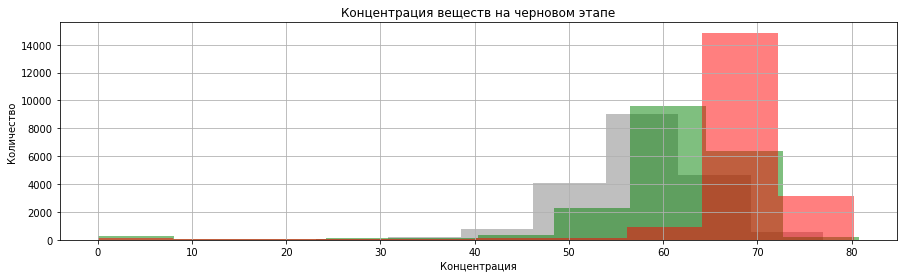

In [30]:
phase = [cons_rougher, cons_primary_cleaner, cons_final]
colors = ['grey', 'green', 'red']
count_color = 0
for i in phase:
    i.hist(figsize=(15,4), alpha=0.5, color=colors[count_color])
    plt.title('Концентрация веществ на черновом этапе')
    plt.xlabel('Концентрация')
    plt.ylabel('Количество')
    count_color += 1

От этапа к этапу суммарная концентрация интересующих нас веществ увеличивается.  
В значениях вижу экстремально малые значения, которые могут повлиять на модель. Определю выбросы и удалю эти строки. 

In [31]:
variance = np.var(cons_rougher)
print(cons_rougher.mean())
print(variance)
print('3 sigm =', cons_rougher.mean() - 3 * (variance ** 0.5))

57.320789408793196
52.02007303816187
3 sigm = 35.683306714555016


In [32]:
for i in phase:
  threshold = i.mean() - 3 * (np.var(i) ** 0.5)
  print(threshold)

35.683306714555016
30.713690144204506
46.37158789367359


Чистить нужно раньше, столбцы исходных df.

**Выводы по "выбросам":**
1) Есть нулевые аномалии в суммарных концентрациях - и их надо "убить". Дело в том, что предполагается, что хоть грамм чего-нибудь но есть в руде. А если мы имеем ноль, значит есть вероятность неточности измерений.
    
2) Нужно решить, как поступать с выбросами в приниципе, т.к. цель - научить модель предсказывать на реальных данных. В выбросах есть реальная концентрация. Важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она не будет уметь предсказывать такие редкие случаи. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.

Спомощью графика "ящик с усами" мы оцениваем выбросы за пределами интервала `q3 +/- 1.5*iqr`, но в теории не обязательноих удалять, это остаётся "на усмотрение бизнеса".
Если же взять вот этот интервал `q3 +/- 3*iqr`, то с очень высокой вероятность можно говорить о грубых выбросах.

## Модель

### Напишу функцию для вычисления итоговой метрики sMAPE.
По ней я буду оценивать качество модели.

In [33]:
def smape_func(target, prediction):
  smape = (abs(target - prediction) / ((abs(target) + abs(prediction)) / 2)).mean() * 100
  return smape

### Обучу разные модели и оценю их качество кросс-валидацией.

Выделю признаки и целевые значения в наборах данных:

In [34]:
features_f = df_train.drop(labels=difference, axis=1).drop(labels='date', axis=1)
features_r = features_f[[
                         'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate',
                         'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au',
                         'rougher.input.floatbank10_sulfate','rougher.input.floatbank10_xanthate',
                         'rougher.input.floatbank11_sulfate','rougher.input.floatbank11_xanthate',
                         'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
                         'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
                         'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
                         'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
                         'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
                         'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']]

target_r = df_train['rougher.output.recovery']
print('Признаки и целевые значения rougher')
print(features_r.shape, target_r.shape)

target_f = df_train['final.output.recovery']
print('Признаки и целевые значения final')
print(features_f.shape, target_f.shape)

Признаки и целевые значения rougher
(14149, 22) (14149,)
Признаки и целевые значения final
(14149, 52) (14149,)


Разобью на тренировочную и валидационную выборки:

In [35]:
features_r_train, features_r_valid, target_r_train, target_r_valid = train_test_split(
    features_r, target_r, test_size=0.25, random_state=12345) # выборка для rougher
features_f_train, features_f_valid, target_f_train, target_f_valid = train_test_split(
    features_f, target_f, test_size=0.25, random_state=12345) # выборка для final

In [36]:
print('Признаки и целевые значения тренировки rougher:')
print(features_r_train.shape, target_r_train.shape)
print('Признаки и целевые значения валидации rougher:')
print(features_r_valid.shape, target_r_valid.shape)
print()
print('Признаки и целевые значения тренировки final:')
print(features_f_train.shape, target_f_train.shape)
print('Признаки и целевые значения валидации final:')
print(features_f_valid.shape, target_f_valid.shape)

Признаки и целевые значения тренировки rougher:
(10611, 22) (10611,)
Признаки и целевые значения валидации rougher:
(3538, 22) (3538,)

Признаки и целевые значения тренировки final:
(10611, 52) (10611,)
Признаки и целевые значения валидации final:
(3538, 52) (3538,)


Выделю тестовые признаки и таргеты для rougher и final:

In [37]:
features_r_test = df_test[[
                         'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate',
                         'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au',
                         'rougher.input.floatbank10_sulfate','rougher.input.floatbank10_xanthate',
                         'rougher.input.floatbank11_sulfate','rougher.input.floatbank11_xanthate',
                         'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
                         'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
                         'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
                         'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
                         'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
                         'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']]
target_r_test = df_test['rougher.output.recovery']
print(features_r_test.shape, target_r_test.shape)

features_f_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_f_test = df_test['final.output.recovery']
print(features_f_test.shape, target_r_test.shape)

(5290, 22) (5290,)
(5290, 52) (5290,)


### Выберу лучшую модель
и проверю её на тестовой выборке.

Напишу функции для вычисления метрик:

In [38]:
def results_func(target, predicted):
  global smape
  smape = smape_func(target, predicted)
  print('sMAPE:', smape)

def smape_final_func(smape_rougher, smape_final):
  smape_final = 0.25 * smape_rougher + 0.75 * smape_final
  return smape_final

#### Модель линейной регрессии

Обучу модель и получу предсказания:

In [39]:
model_rougher = LinearRegression()
model_rougher.fit(features_r_train, target_r_train)
predicted_r_valid = model_rougher.predict(features_r_valid)

In [40]:
model_final = LinearRegression()
model_final.fit(features_f_train , target_f_train)
predicted_f_valid = model_final.predict(features_f_valid)

Оценю метрики по предсказаниям на валидационной выборке:

In [41]:
print('Rougher')
results_func(target_r_valid, predicted_r_valid)
smape_rougher = smape
print('Final')
results_func(target_f_valid, predicted_f_valid)
smape_final = smape
smape_linear = smape_final_func(smape_rougher, smape_final)
print('Итоговая sMAPE по линейной регрессии', smape_linear)

Rougher
sMAPE: 10.929762505972333
Final
sMAPE: 8.596337649103134
Итоговая sMAPE по линейной регрессии 9.179693863320434


#### Модель дерева решений

###### Дерево - rougher

In [42]:
smape_scorer = make_scorer(smape_func, greater_is_better=False)

In [43]:
%%time
model_tree = DecisionTreeRegressor(random_state=12345)
tree_parameters = {
    'max_depth': range(1, 51, 5)
}
grid_tree = GridSearchCV(estimator=model_tree, param_grid=tree_parameters, cv=3, scoring=smape_scorer, verbose=3)
grid_tree.fit(features_r, target_r)
print(grid_tree.best_params_)
#print()
#print(grid_tree.best_estimator_)
predicted_r_test = grid_tree.predict(features_r_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=1 .....................................................
[CV] ....................... max_depth=1, score=-10.864, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ....................... max_depth=1, score=-13.044, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ....................... max_depth=1, score=-15.650, total=   0.1s
[CV] max_depth=6 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... max_depth=6, score=-11.176, total=   0.2s
[CV] max_depth=6 .....................................................
[CV] ....................... max_depth=6, score=-29.057, total=   0.2s
[CV] max_depth=6 .....................................................
[CV] ....................... max_depth=6, score=-12.679, total=   0.2s
[CV] max_depth=11 ....................................................
[CV] ...................... max_depth=11, score=-12.564, total=   0.3s
[CV] max_depth=11 ....................................................
[CV] ...................... max_depth=11, score=-30.930, total=   0.3s
[CV] max_depth=11 ....................................................
[CV] ...................... max_depth=11, score=-16.621, total=   0.3s
[CV] max_depth=16 ....................................................
[CV] ...................... max_depth=16, score=-12.799, total=   0.4s
[CV] max_depth=16 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    9.9s finished


###### Дерево - final

In [44]:
%%time
model_tree = DecisionTreeRegressor(random_state=12345)
tree_parameters = {
    'max_depth': range(1, 51, 5)
}
grid_tree = GridSearchCV(estimator=model_tree, param_grid=tree_parameters, cv=3, scoring=smape_scorer, verbose=2)
grid_tree.fit(features_f, target_f)
print(grid_tree.best_params_)
print()
print(grid_tree.best_estimator_)
predicted_f_test = grid_tree.predict(features_f_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=6 .....................................................
[CV] ...................................... max_depth=6, total=   0.4s
[CV] max_depth=6 .....................................................
[CV] ...................................... max_depth=6, total=   0.3s
[CV] max_depth=6 .....................................................
[CV] ...................................... max_depth=6, total=   0.4s
[CV] max_depth=11 ....................................................
[CV] ..................................... max_depth=11, total=   0.6s
[CV] max_depth=11 ....................................................
[CV] ..................................... max_depth=11, total=   0.6s
[CV] max_depth=11 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.1s finished


In [45]:
smape_rougher = smape_func(target_r_test, predicted_r_test)
print('sMAPE по дереву решений на этапе rougher:', smape_rougher)
smape_final = smape_func(target_f_test, predicted_f_test)
print('sMAPE по дереву решений на этапе final:', smape_final)
smape_tree = smape_final_func(smape_rougher, smape_final)
print('Итоговая sMAPE по дереву решений:', smape_tree)

sMAPE по дереву решений на этапе rougher: 10.672223637031998
sMAPE по дереву решений на этапе final: 9.462098690409142
Итоговая sMAPE по дереву решений: 9.764629927064856


#### Модель случайного леса

###### Лес - rougher

In [46]:
%%time
model_forest = RandomForestRegressor(random_state=12345)
forest_parameters = {
    'max_depth': range(1, 51, 5),
    'n_estimators': range(100, 200, 20)
}
grid_forest = GridSearchCV(
    estimator=model_forest, param_grid=forest_parameters, cv=3, scoring=smape_scorer, verbose=2)
grid_forest.fit(features_r, target_r)
print(grid_forest.best_params_)
#print()
#print(grid_forest.best_estimator_)
predicted_r_test = grid_forest.predict(features_r_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=1, n_estimators=100, total=   1.9s
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .................... max_depth=1, n_estimators=100, total=   1.9s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] .................... max_depth=1, n_estimators=100, total=   1.9s
[CV] max_depth=1, n_estimators=120 ...................................
[CV] .................... max_depth=1, n_estimators=120, total=   2.2s
[CV] max_depth=1, n_estimators=120 ...................................
[CV] .................... max_depth=1, n_estimators=120, total=   2.3s
[CV] max_depth=1, n_estimators=120 ...................................
[CV] .................... max_depth=1, n_estimators=120, total=   2.3s
[CV] max_depth=1, n_estimators=140 ...................................
[CV] .................... max_depth=1, n_estimators=140, total=   2.6s
[CV] max_depth=1, n_estimators=140 ...................................
[CV] .................... max_depth=1, n_estimators=140, total=   2.6s
[CV] max_depth=1, n_estimators=140 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 67.4min finished


{'max_depth': 1, 'n_estimators': 100}
CPU times: user 1h 6min 46s, sys: 7.31 s, total: 1h 6min 54s
Wall time: 1h 7min 26s


###### Лес - final

In [47]:
%%time
model_forest = RandomForestRegressor(random_state=12345)
forest_parameters = {
    'max_depth': range(1, 51, 5),
    'n_estimators': range(100, 200, 20)
}
grid_forest = GridSearchCV(
    estimator=model_forest, param_grid=forest_parameters, cv=3, scoring=smape_scorer, verbose=3)
grid_forest.fit(features_f, target_f)
print(grid_forest.best_params_)
predicted_f_test = grid_forest.predict(features_f_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=1, n_estimators=100, score=-10.485, total=   4.1s
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] ..... max_depth=1, n_estimators=100, score=-11.372, total=   4.1s
[CV] max_depth=1, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s


[CV] ..... max_depth=1, n_estimators=100, score=-11.969, total=   4.1s
[CV] max_depth=1, n_estimators=120 ...................................
[CV] ..... max_depth=1, n_estimators=120, score=-10.485, total=   4.9s
[CV] max_depth=1, n_estimators=120 ...................................
[CV] ..... max_depth=1, n_estimators=120, score=-11.375, total=   4.9s
[CV] max_depth=1, n_estimators=120 ...................................
[CV] ..... max_depth=1, n_estimators=120, score=-11.967, total=   5.0s
[CV] max_depth=1, n_estimators=140 ...................................
[CV] ..... max_depth=1, n_estimators=140, score=-10.516, total=   5.9s
[CV] max_depth=1, n_estimators=140 ...................................
[CV] ..... max_depth=1, n_estimators=140, score=-11.373, total=   5.8s
[CV] max_depth=1, n_estimators=140 ...................................
[CV] ..... max_depth=1, n_estimators=140, score=-11.967, total=   5.7s
[CV] max_depth=1, n_estimators=160 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 156.2min finished


{'max_depth': 1, 'n_estimators': 100}
CPU times: user 2h 34min 19s, sys: 4.95 s, total: 2h 34min 24s
Wall time: 2h 36min 16s


In [48]:
smape_rougher = smape_func(target_r_test, predicted_r_test)
print('sMAPE по дереву решений на этапе rougher:', smape_rougher)
smape_final = smape_func(target_f_test, predicted_f_test)
print('sMAPE по дереву решений на этапе final:', smape_final)
smape_forest = smape_final_func(smape_rougher, smape_final)
print('Итоговая sMAPE по дереву решений:', smape_forest)

sMAPE по дереву решений на этапе rougher: 9.196272548680867
sMAPE по дереву решений на этапе final: 9.196272548680867
Итоговая sMAPE по дереву решений: 9.196272548680867


#### Сравню метрику с константной моделью.

In [49]:
model_dummy_r = DummyRegressor(strategy="median")
model_dummy_r.fit(features_r_train, target_r_train)
predicted_r_dummy = model_dummy_r.predict(features_r_test)
smape_dummy_rougher = smape_func(target_r_test, predicted_r_dummy)
print('константная модель rougher:', smape_dummy_rougher)

model_dummy_f = DummyRegressor(strategy="median")
model_dummy_f.fit(features_f_train, target_f_train)
predicted_f_dummy = model_dummy_f.predict(features_f_test)
smape_dummy_final = smape_func(target_f_test, predicted_f_dummy)
print('константная модель final:', smape_dummy_final)
print()
print('sMAPE константной модели:', smape_final_func(smape_dummy_rougher, smape_dummy_final))
print('Линейная регрессия:', smape_linear)
print('Решающее дерево:', smape_tree)
print('Случайный лес:', smape_forest)

константная модель rougher: 8.617673225725978
константная модель final: 9.777342873767564

sMAPE константной модели: 9.487425461757168
Линейная регрессия: 9.179693863320434
Решающее дерево: 9.764629927064856
Случайный лес: 9.196272548680867


## Выводы.

Лучшая общая метрика получилась по модели случайного леса, её метрика немного лучше константной модели. Хотя модель обучается довольно долго на таких вводных, что не хорошо с точки зрения использования ресурсов.  
Итоговое лучшее значение метрики sMAPE, которой удалось добиться: 9.196.

В проекте есть что доработать:
1. Качество данных на входе: ещё раз оценить аномалии, пропуски, соответствие физике (правдиво ли всё)<br>
2. Работа с моделями:
    - Генерация и поиск бизнес-факторов для моделирования: возможно что-то упустили или можно придумать что-то гибридное из имеющихся факторов, если пройтись ещё раз по бизнес-цепочке процесса вместе с экспертом в предметной области.
    - Подбор самих моделей и их метрик.
    - Подбор параметров выбранных показателей у выбранных моделей. 
3. Есть другие параметры самого процесса извлечения руды: температура, скорость конвейера, сила удара чего-то там, их тоже можно использовать.
4. Стоит разобраться ещё раз с физическими и производственными процессами. Возможно приниципиально иное решение можно создать. 
5. Если больше внимания в исследовани уделить "Статистическому анализу данных", т.е. преварительной подготовке данных в этом проекте, которая в результате позволит найти иное решение.

Но цель проекта достигнута:
1) пройдены важные этапы построения производственной модели;  
2) модель предсказывает с точностью лучше константной.